## Import Important Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
data=pd.read_csv(r"/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
Missing_value=data.isnull().sum()
Missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
missing_precentage=Missing_value/len(data)*100
missing_df=pd.DataFrame({'missing_values':Missing_value,'missing_precentage':missing_precentage})
missing_df

,missing_values,missing_precentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [6]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
data.duplicated().sum()

0

## Preprocess Data

In [8]:
dummise_sex=pd.get_dummies(data['Sex']).astype(int)
dummise_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [9]:
data=pd.concat([dummise_sex,data],axis=1)
data.head()

,female,male,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,0,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.drop(columns='Sex',inplace=True,axis=1)
data.head()

,female,male,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.drop(columns='male',axis=1,inplace=True)

In [12]:
data.rename(columns={'male':"Gender"},inplace=True)
data.head()

,female,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
data.Name.nunique()/data.shape[0]*100

100.0

In [15]:
data.Ticket.nunique()/data.shape[0]*100

76.43097643097643

In [16]:
data.PassengerId.nunique()/data.shape[0]*100

100.0

In [17]:
data.Fare.nunique()/data.shape[0]*100

27.83389450056117

In [18]:
data.Pclass.nunique()/data.shape[0]*100

0.33670033670033667

In [19]:
data.SibSp.nunique()/data.shape[0]*100

0.7856341189674524

In [20]:
data.Parch.nunique()/data.shape[0]*100

0.7856341189674524

In [21]:
data.drop(['Ticket','PassengerId','Name'],axis=1,inplace=True)

In [22]:
data.head()

,female,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,3,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,1,3,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,0,3,35.0,0,0,8.0500,NaN,S


## Handling missing data

<Axes: >

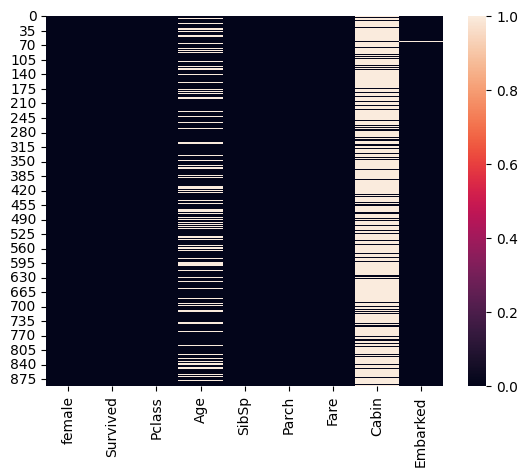

In [23]:
sns.heatmap(data.isnull())

In [24]:
data.Age.min()

0.42

In [25]:
data.Age.max()

80.0

In [26]:
data.Age.mode()

0    24.0
Name: Age, dtype: float64

<Axes: >

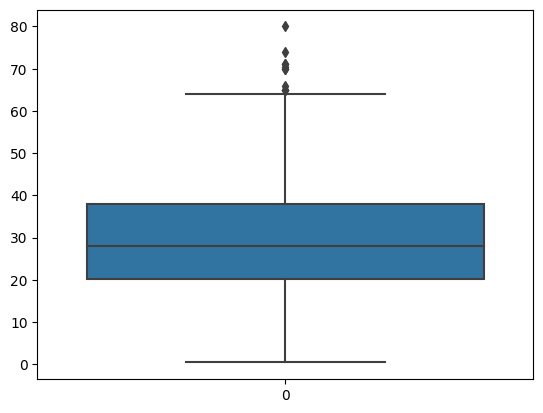

In [27]:
sns.boxplot(data.Age)

In [28]:
data.Age.mean() - data.Age.std() *3

-13.88037434994331

In [29]:
data.Age.mean() + data.Age.std()*3

73.27860964406095

In [30]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data.Age.isnull().sum()

0

In [31]:
data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [32]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

In [33]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [35]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [36]:
data.isnull().sum()

female      0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Embarked'>

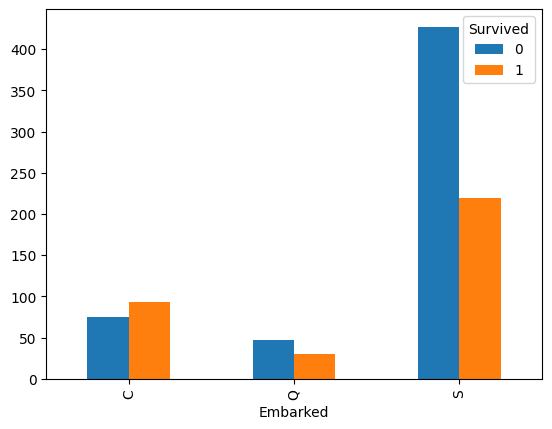

In [37]:
pd.crosstab(data.Embarked,data.Survived).plot(kind='bar')

<Axes: xlabel='Embarked'>

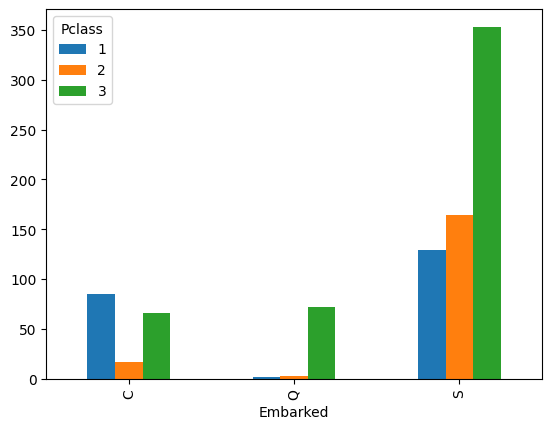

In [38]:
pd.crosstab(data.Embarked,data.Pclass).plot(kind='bar')

In [39]:
data.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [40]:
data.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

<Axes: xlabel='Survived'>

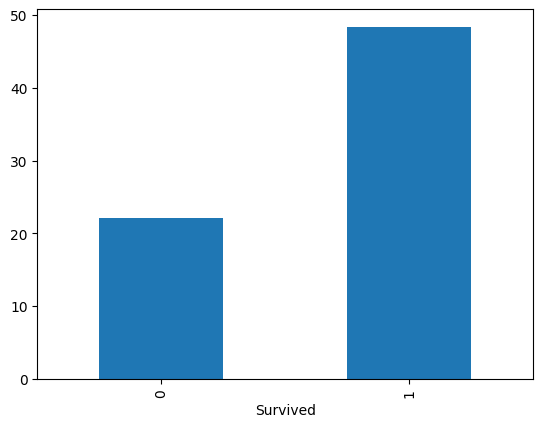

In [41]:
data.groupby('Survived')['Fare'].mean().plot(kind='bar')

<Axes: xlabel='Survived'>

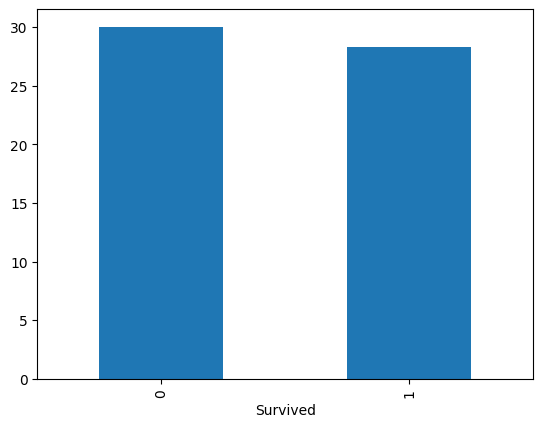

In [42]:
data.groupby('Survived')['Age'].mean().plot(kind='bar')

In [43]:
data.groupby('Survived')['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

In [44]:
data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

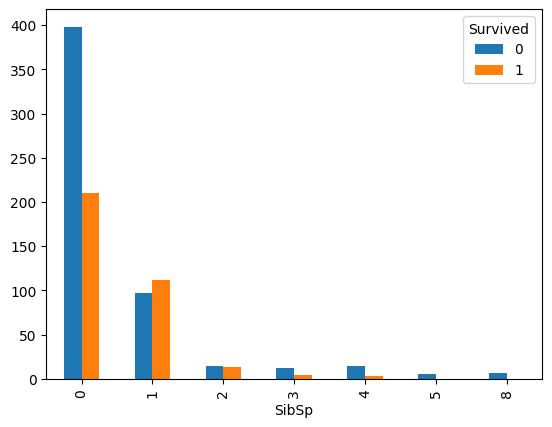

In [45]:
pd.crosstab(data.SibSp,data.Survived).plot(kind='bar')

<Axes: xlabel='Parch'>

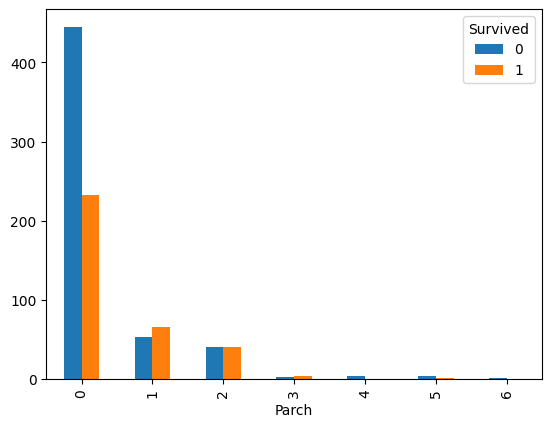

In [46]:
pd.crosstab(data.Parch,data.Survived).plot(kind='bar')

<Axes: xlabel='female'>

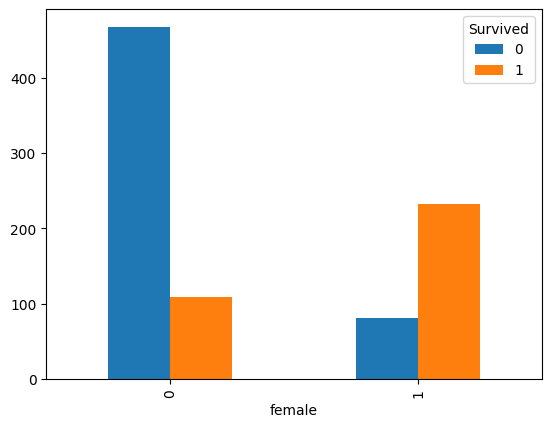

In [47]:
pd.crosstab(data.female,data.Survived).plot(kind='bar')

In [48]:
dummise_Embarked=pd.get_dummies(data['Embarked']).astype(int)
dummise_Embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [49]:
data=pd.concat([dummise_Embarked,data],axis=1)
data.drop(columns='Embarked',axis=1,inplace=True)
data.head()

,C,Q,S,female,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,0,3,22.0,1,0,7.2500
1,1,0,0,1,1,1,38.0,1,0,71.2833
2,0,0,1,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,1,35.0,1,0,53.1000
4,0,0,1,0,0,3,35.0,0,0,8.0500


## Split Data

In [50]:
x=data.drop(columns='Survived',axis=1)
y=data.Survived

In [51]:
x

,C,Q,S,female,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,35.0,1,0,53.1000
4,0,0,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,2,27.0,0,0,13.0000
887,0,0,1,1,1,19.0,0,0,30.0000
888,0,0,1,1,3,28.0,1,2,23.4500
889,1,0,0,0,1,26.0,0,0,30.0000


In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [53]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Build Model

In [54]:
model_lg=LogisticRegression()

In [55]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=model_lg.predict(x_test)

In [57]:
accuracy_train=model_lg.score(x_train,y_train)*100
accuracy_train

80.33707865168539

In [58]:
accuracy_test=model_lg.score(x_test, y_test)*100
accuracy_test

81.00558659217877